In [114]:
%matplotlib inline
import pandas as pd
import time
from datetime import date
import warnings
import matplotlib.pyplot as plt
import numpy as np
warnings.filterwarnings('ignore')
import calendar

In [2]:
f = open('tweets.csv', 'rt')
o = open('tweets_clean.csv', 'r+')
for line in f:
    newline = line.replace('“','').replace('”','').replace('’','').replace('‘','').replace('–','-')
    o.write(newline)
o.close()

In [3]:
tweets_raw=pd.read_csv("tweets_clean.csv")
tweets_raw.columns=['id','date','rt','text','mention','hashtag0','hashtag1','hashtag2','url','pic','retweet']

In [149]:
tweets=tweets_raw[tweets_raw.rt.isnull() & (tweets_raw.retweet<1000)]
tweets.drop('rt',1,inplace=True)
tweets.fillna(0, inplace=True)

In [150]:
for col in ['mention','hashtag0','hashtag1','hashtag2','url','pic']:
    tweets[col][tweets[col]<>0]=1

In [151]:
tweets['datetime']=tweets.date.apply(lambda x:time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(x,'%a %b %d %H:%M:%S +0000 %Y')))

In [152]:
tweets['year']=tweets.datetime.str[:4]
tweets['month']=tweets.datetime.str[5:7]
tweets['day']=tweets.date.str[:3]
tweets['dayn']=tweets.day.apply(lambda x:time.strptime(x, '%a').tm_wday)
tweets['hour']=tweets.datetime.str[11:13]
tweets['age']=((date.today()-pd.to_datetime(tweets.datetime))/ np.timedelta64(1, 'D')).astype(int)

In [153]:
tweets['hashtag']=(tweets.hashtag0+tweets.hashtag1+tweets.hashtag2)

In [154]:
df=tweets[['year','month','dayn','hour','mention','hashtag','url','pic','age','retweet']].astype(int)

In [155]:
df.corr()

,year,month,dayn,hour,mention,hashtag,url,pic,age,retweet
year,1.000000,0.674299,-0.056588,-0.059178,-0.098031,-0.188268,-0.070022,-0.025740,-0.989948,-0.134979
month,0.674299,1.000000,0.042432,-0.058640,-0.062538,-0.095435,0.021637,0.028623,-0.767338,-0.025090
dayn,-0.056588,0.042432,1.000000,-0.082563,-0.032271,0.008449,0.037872,0.064212,0.040377,0.140621
hour,-0.059178,-0.058640,-0.082563,1.000000,0.047578,0.009926,-0.013516,-0.002046,0.062601,-0.035004
mention,-0.098031,-0.062538,-0.032271,0.047578,1.000000,-0.181317,-0.118569,0.078916,0.095025,-0.113510
hashtag,-0.188268,-0.095435,0.008449,0.009926,-0.181317,1.000000,-0.009947,0.022033,0.182344,0.052302
url,-0.070022,0.021637,0.037872,-0.013516,-0.118569,-0.009947,1.000000,-0.573698,0.058179,-0.308116
pic,-0.025740,0.028623,0.064212,-0.002046,0.078916,0.022033,-0.573698,1.000000,0.013864,0.546578
age,-0.989948,-0.767338,0.040377,0.062601,0.095025,0.182344,0.058179,0.013864,1.000000,0.121031
retweet,-0.134979,-0.025090,0.140621,-0.035004,-0.113510,0.052302,-0.308116,0.546578,0.121031,1.000000


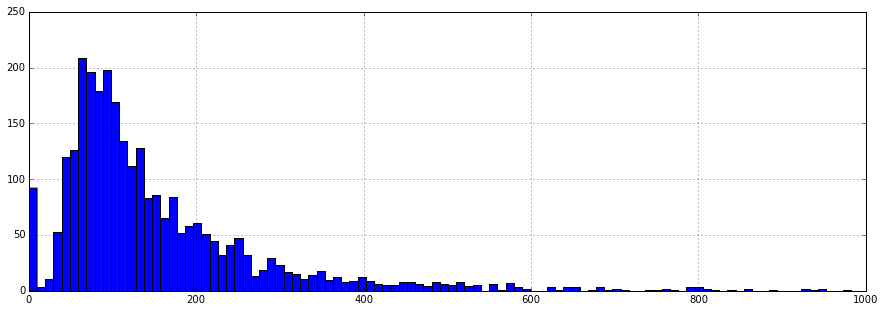

In [156]:
df.retweet.hist(bins=100,figsize=(15,5))

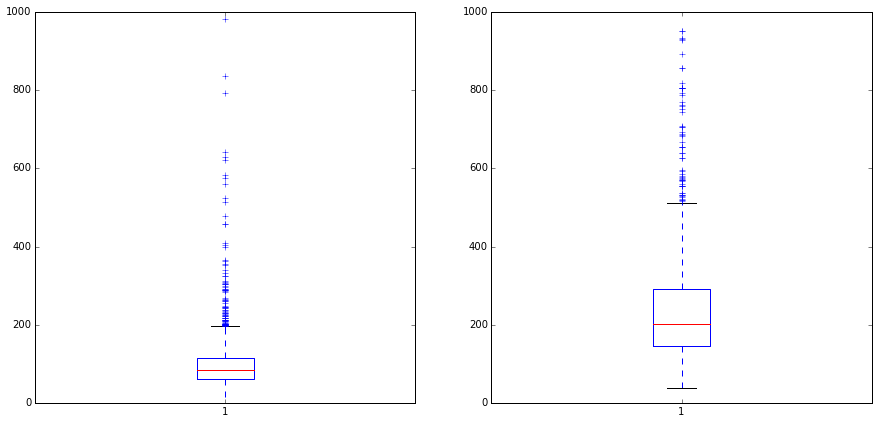

In [157]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
plt.subplot(121); plt.ylabel(""); plt.xlabel("")
plt.boxplot(df[(df.pic==0)].retweet.tolist())
plt.subplot(122); plt.ylabel(""); plt.xlabel("")
plt.boxplot(df[(df.pic==1)].retweet.tolist())
plt.show()

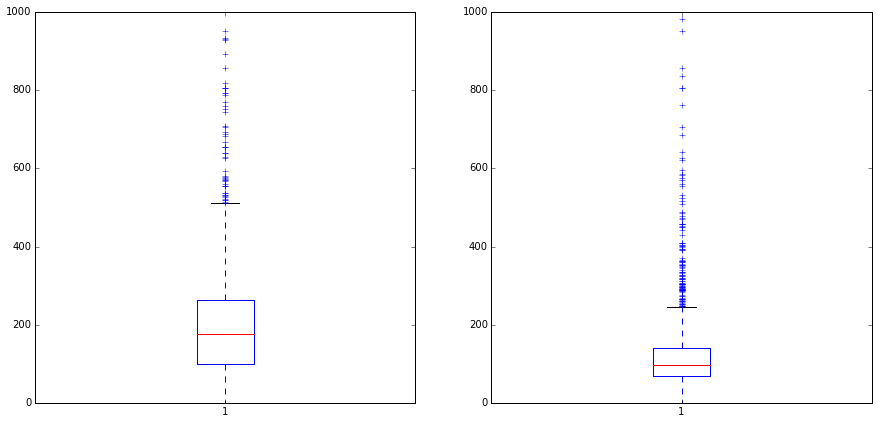

In [162]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
plt.subplot(121); plt.ylabel(""); plt.xlabel("")
plt.boxplot(df[(df.url==0)].retweet.tolist())
plt.subplot(122); plt.ylabel(""); plt.xlabel("")
plt.boxplot(df[(df.url==1)].retweet.tolist())
plt.show()

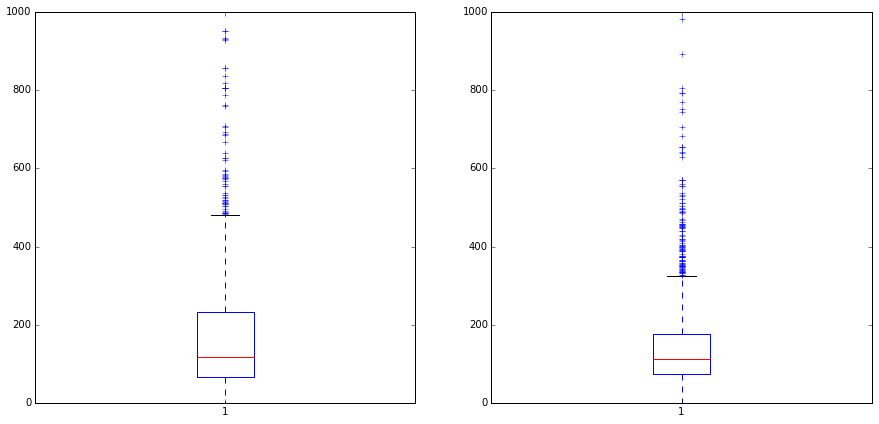

In [158]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
plt.subplot(121); plt.ylabel(""); plt.xlabel("")
plt.boxplot(df[(df.year==2014)].retweet.tolist())
plt.subplot(122); plt.ylabel(""); plt.xlabel("")
plt.boxplot(df[(df.year==2015)].retweet.tolist())
plt.show()

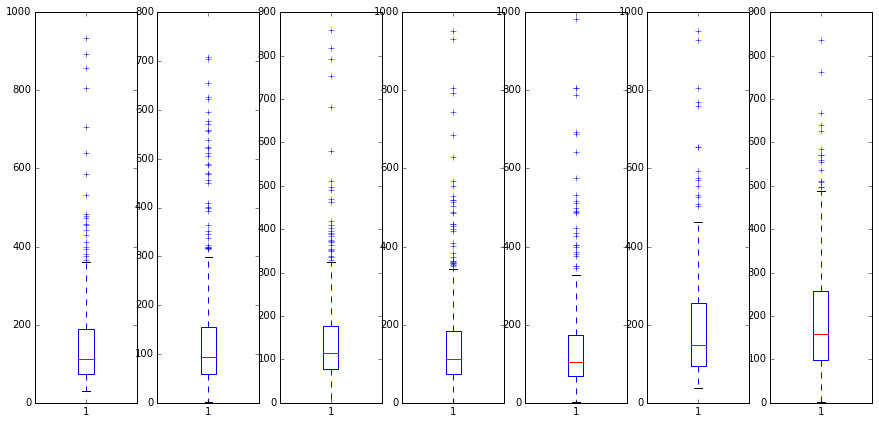

In [159]:
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(15,7))
plt.subplot(171); plt.ylabel(""); plt.xlabel("")
plt.boxplot(df[(df.dayn==0)].retweet.tolist())
plt.subplot(172); plt.ylabel(""); plt.xlabel("")
plt.boxplot(df[(df.dayn==1)].retweet.tolist())
plt.subplot(173); plt.ylabel(""); plt.xlabel("")
plt.boxplot(df[(df.dayn==2)].retweet.tolist())
plt.subplot(174); plt.ylabel(""); plt.xlabel("")
plt.boxplot(df[(df.dayn==3)].retweet.tolist())
plt.subplot(175); plt.ylabel(""); plt.xlabel("")
plt.boxplot(df[(df.dayn==4)].retweet.tolist())
plt.subplot(176); plt.ylabel(""); plt.xlabel("")
plt.boxplot(df[(df.dayn==5)].retweet.tolist())
plt.subplot(177); plt.ylabel(""); plt.xlabel("")
plt.boxplot(df[(df.dayn==6)].retweet.tolist())
plt.show()

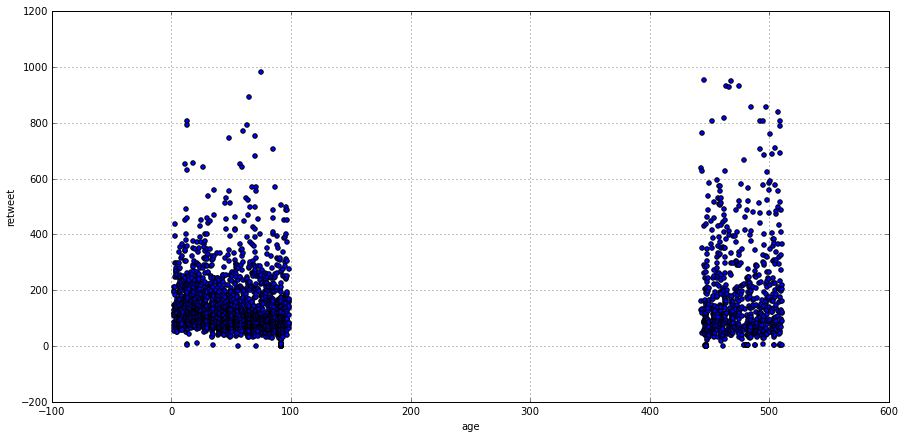

In [160]:
df.plot(kind='scatter', x='age', y='retweet',figsize=(15,7));

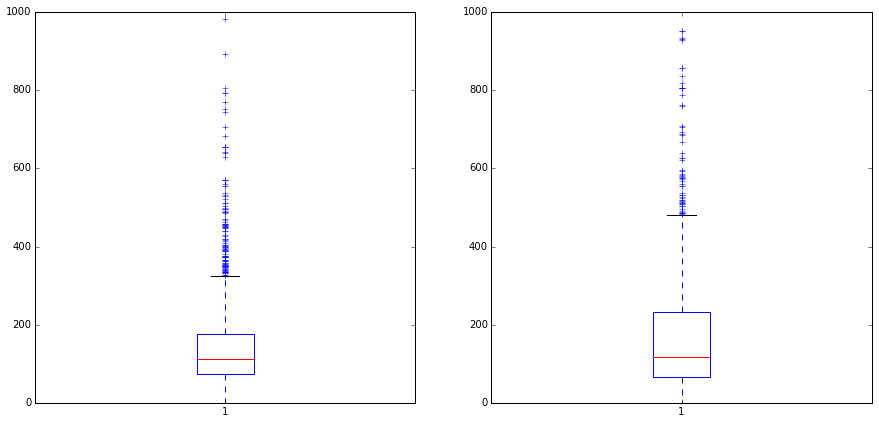

In [161]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
plt.subplot(121); plt.ylabel(""); plt.xlabel("")
plt.boxplot(df[(df.age<100)].retweet.tolist())
plt.subplot(122); plt.ylabel(""); plt.xlabel("")
plt.boxplot(df[(df.age>100)].retweet.tolist())
plt.show()